# 绘图与可视化

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
%matplotlib notebook

## 简明 matplotlib API 入门

In [3]:
import matplotlib.pyplot as plt
import numpy as np

data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


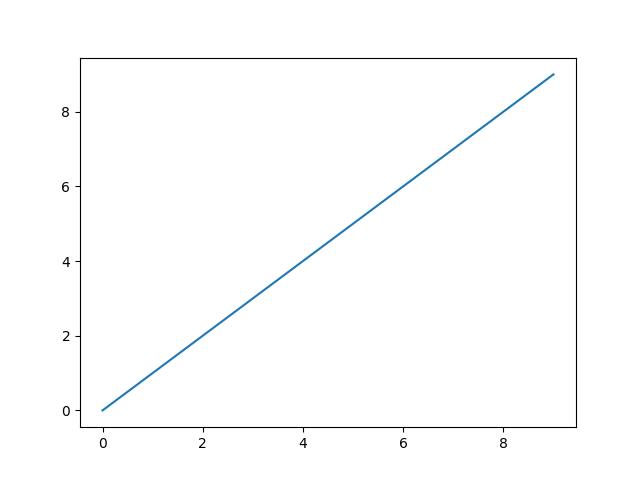

In [4]:
plt.plot(data)

### 图片与子图

<IPython.core.display.Javascript object>


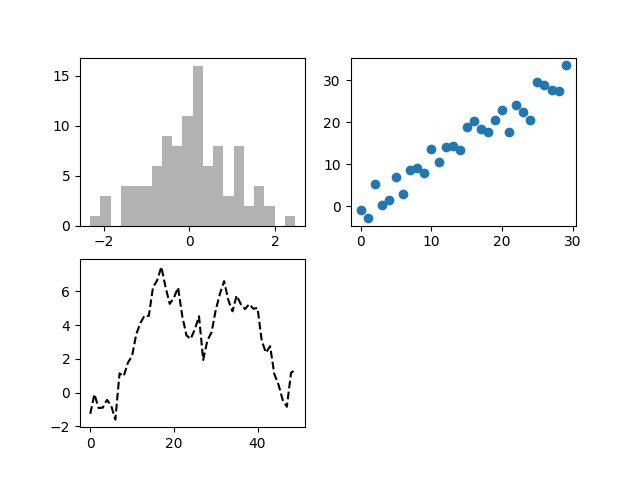

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [10]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [11]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [12]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


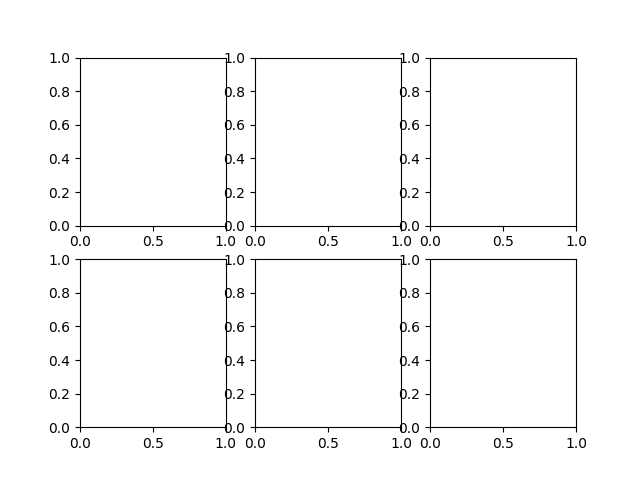

In [13]:
fig, axes = plt.subplots(2, 3)

In [14]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1166c19b0>,
      dtype=object)

#### 调整子图周围的间距

subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

<IPython.core.display.Javascript object>


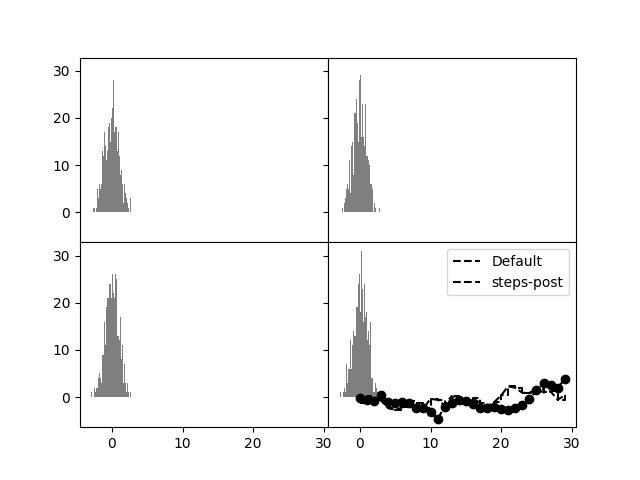

In [15]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 颜色、标记和线类型

ax.plot(x, y, 'g--')

ax.plot(x, y, linestyle='--', color='g')

In [16]:
from numpy.random import randn

plt.plot(randn(30).cumsum(), 'ko--')  # 标记必须跟在颜色后面

plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='0')

In [17]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

In [18]:
plt.plot(data, 'k--', drawstyle='steps-post', label='steps-post')

In [19]:
plt.legend(loc='best')

### 刻度、标签和图例

#### 设置标题、轴标签、刻度和刻度标签

<IPython.core.display.Javascript object>


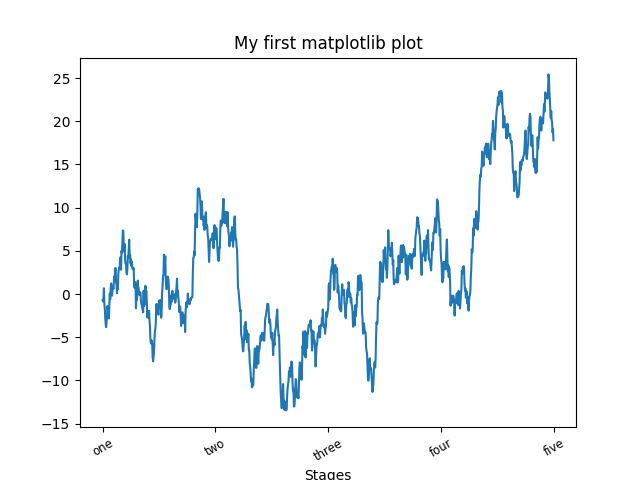

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [21]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],  # 标签赋值
                            rotation=30, fontsize='small')

In [22]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [23]:
ax.set_xlabel('Stages')

Text(0.5, 10.763891973024519, 'Stages')

props = {'title':'My first matplotlib plot',
       'xlable':'Stages'}
ax.set(**props)

#### 添加图例

<IPython.core.display.Javascript object>


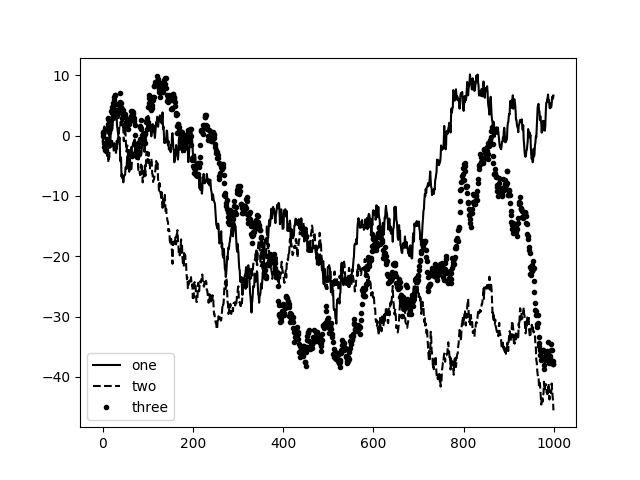

In [24]:
from numpy.random import randn

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [25]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [26]:
ax.plot(randn(1000).cumsum(), 'k.', label='three' )

In [27]:
ax.legend(loc='best')  # 自动生成图例

### 注释与子图加工

ax.text(x, y, 'Hello world!', family='monespace', fontsie=10)

<IPython.core.display.Javascript object>


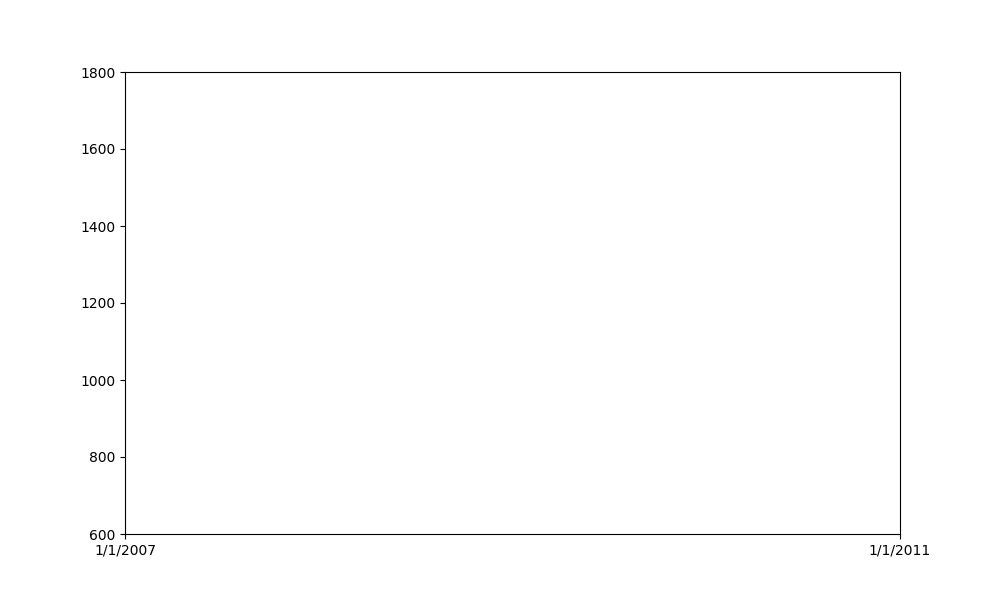

(array([0.]), array([1.]))

In [34]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(
                    facecolor='black', 
                    headwidth=4, 
                    width=2, 
                    headlength=4),
                horizontalalignment='left',
                verticalalignment='top'
               )    

ax.set_xlim(['1/1/2007', '1/1/2011'])

In [35]:
ax.set_ylim([600, 1800])

(600, 1800)

In [36]:
ax.set_title('Important dates in the 2008-2009 financial crisis')

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

<IPython.core.display.Javascript object>


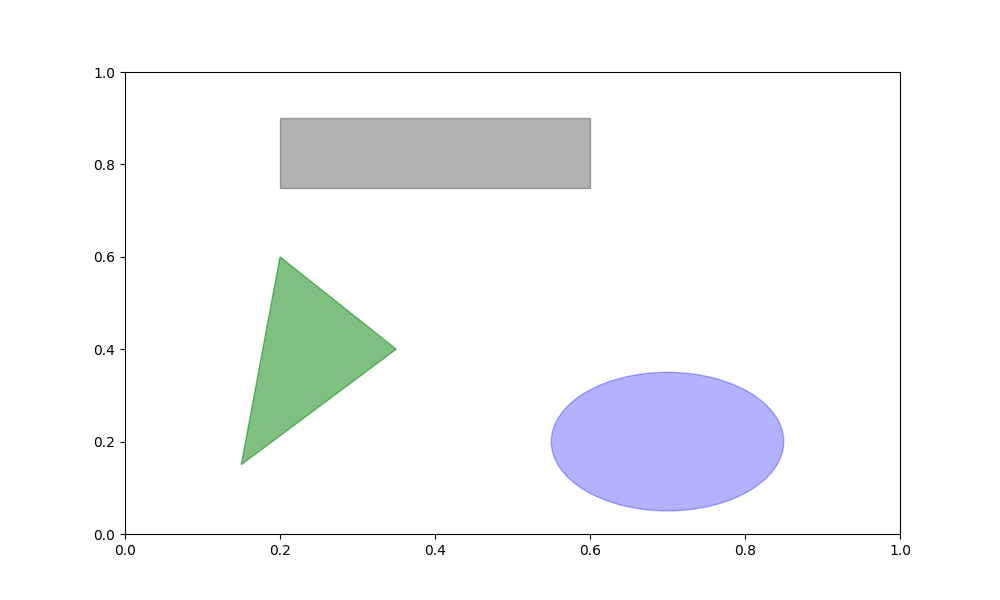

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 将图片保存到文件

plt.savefig('figpath.svg')

plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [40]:
from io import BytesIO
    
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue

### matplotlib设置

plt.rc('figure', figsize=(10, 10))

font_options = {'family' : 'monospace', 'weight' : 'bold', 'size' : 'small'} 

plt.rc('font', **font_options)

## 使用pandas和seaborn绘图

### 折线图

<IPython.core.display.Javascript object>


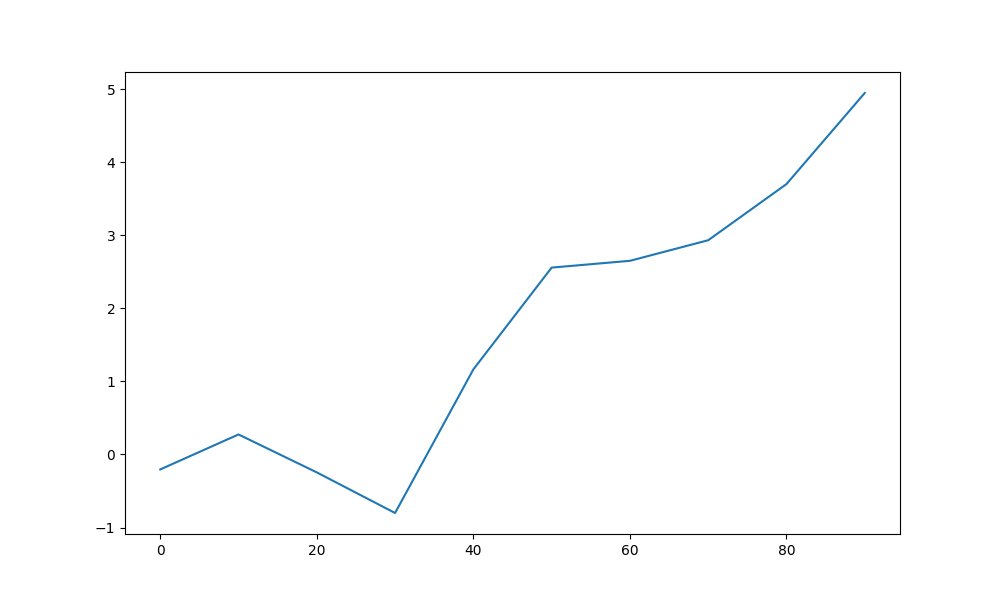

In [3]:
s = pd.Series(np.random.randn(10).cumsum(),
             index=np.arange(0, 100, 10))
s.plot()

<IPython.core.display.Javascript object>


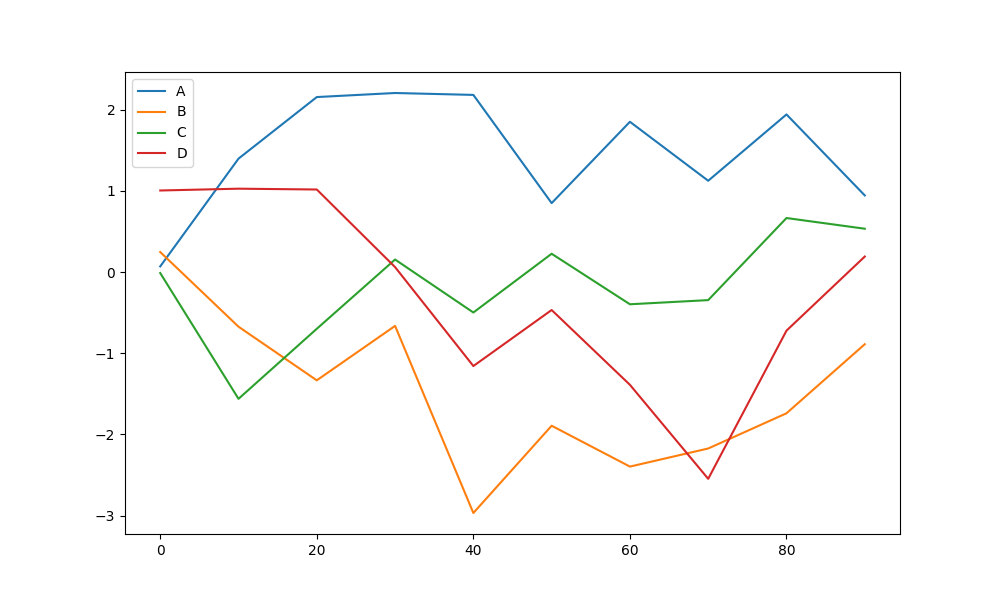

In [5]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))
df.plot()

### 柱状图

<IPython.core.display.Javascript object>


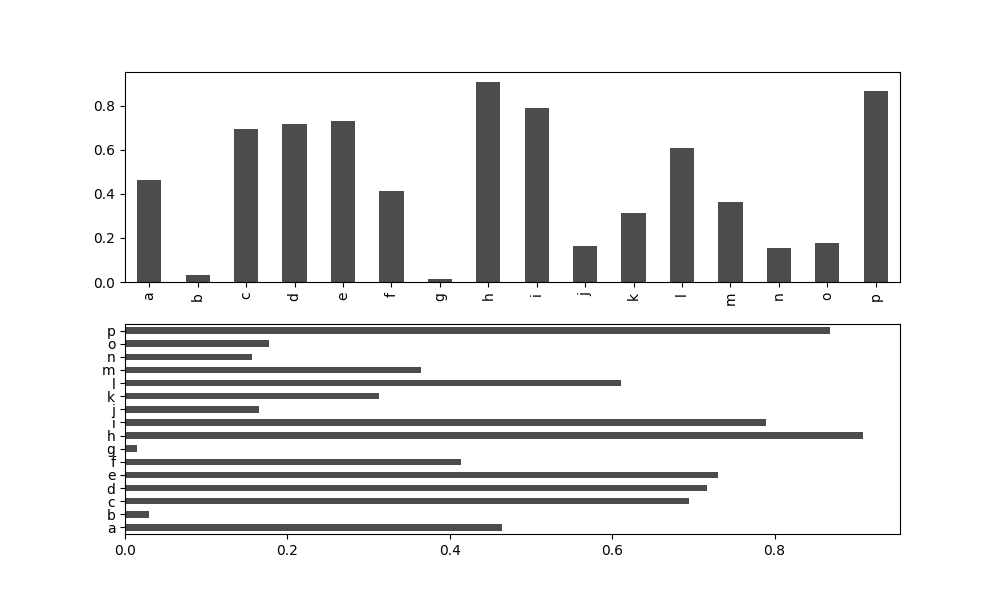

In [8]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16),
                index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)  # 水平柱状图
data.plot.barh(ax=axes[1], color='k', alpha=0.7)  # 垂直柱状图

In [9]:
df = pd.DataFrame(np.random.rand(6, 4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.290095,0.585180,0.453995,0.411178
two,0.882634,0.692708,0.279273,0.064440
three,0.198624,0.931683,0.854414,0.954735
four,0.052253,0.579472,0.480496,0.021709
five,0.373620,0.414092,0.603907,0.671749
six,0.838866,0.779526,0.400701,0.794529


<IPython.core.display.Javascript object>


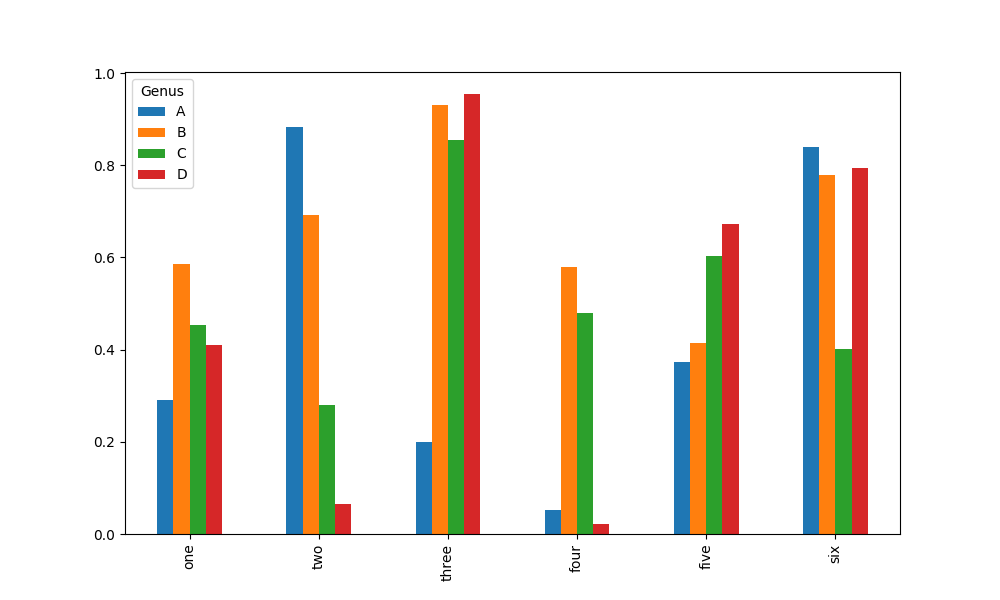

<IPython.core.display.Javascript object>


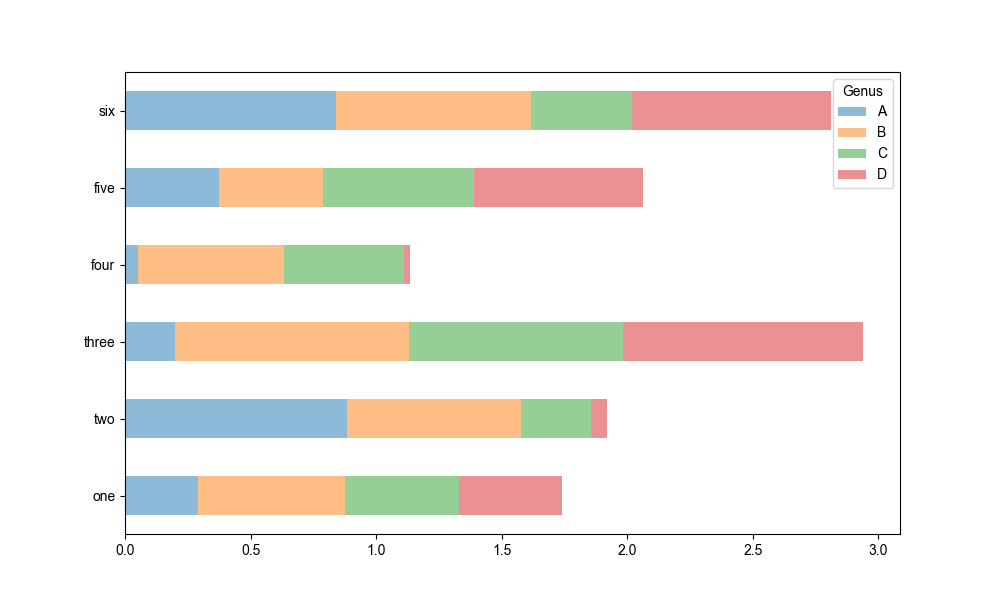

In [11]:
df.plot.bar()  # DataFrame并排柱状图
df.plot.barh(stacked=True, alpha=0.5)  # DataFrame堆积柱状图

In [12]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [14]:
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


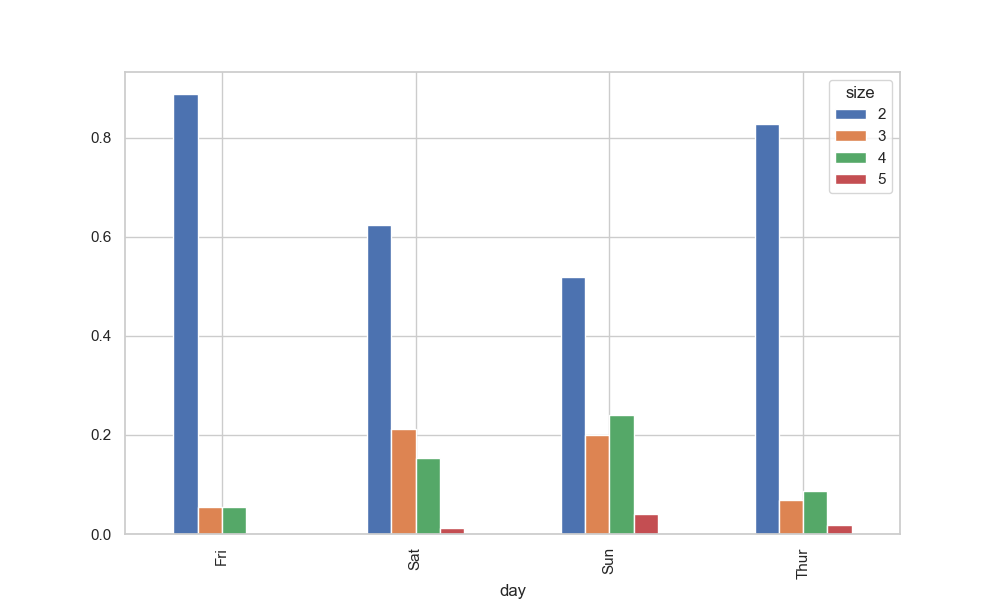

In [29]:
party_pcts.plot.bar()

In [19]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


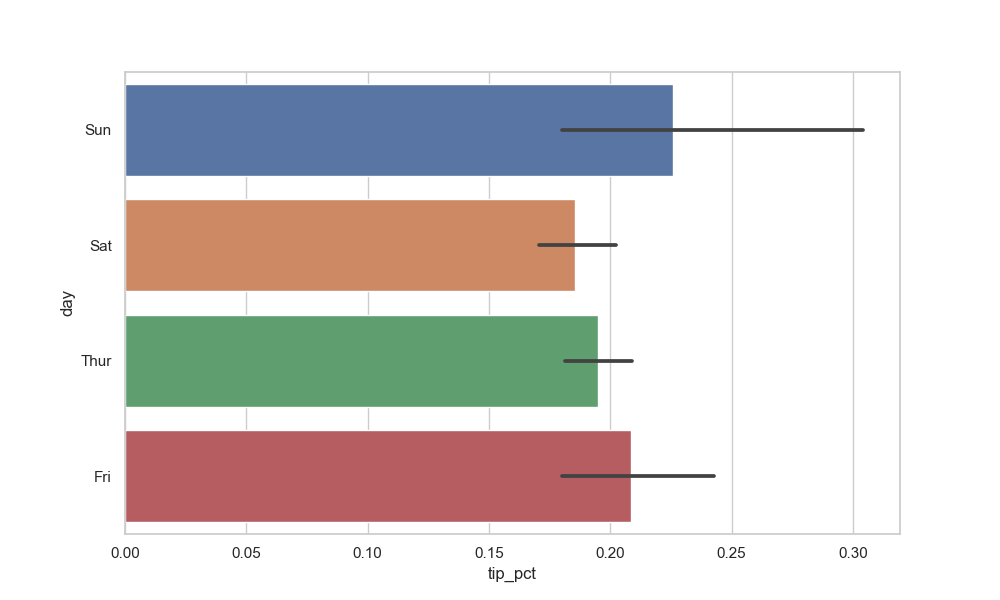

In [32]:
import seaborn as sns

plt.figure()

sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<IPython.core.display.Javascript object>


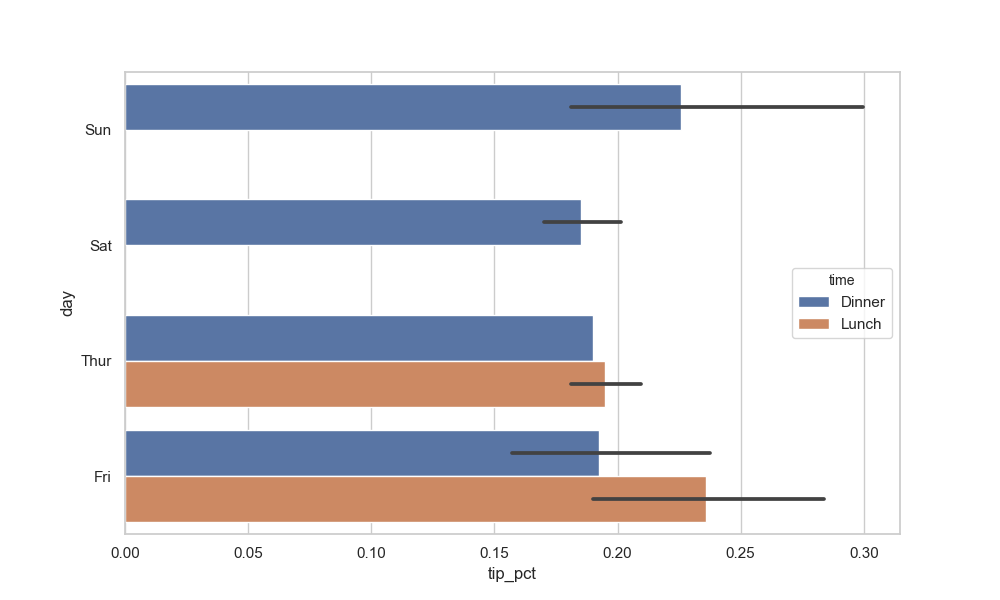

In [33]:
plt.figure()

sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [35]:
sns.set(style="whitegrid")

### 直方图和密度图

<IPython.core.display.Javascript object>


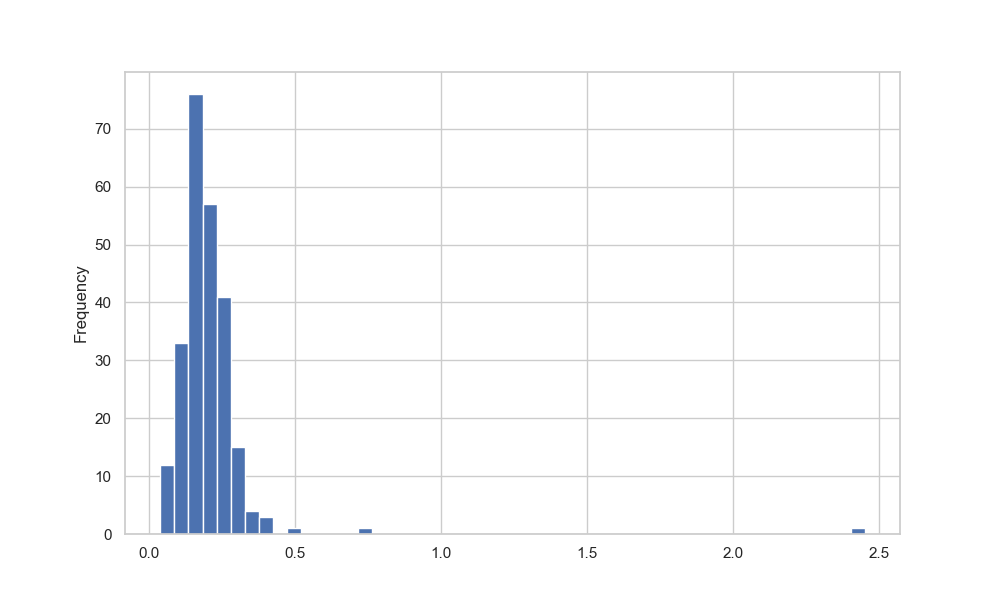

In [36]:
plt.figure()

tips['tip_pct'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


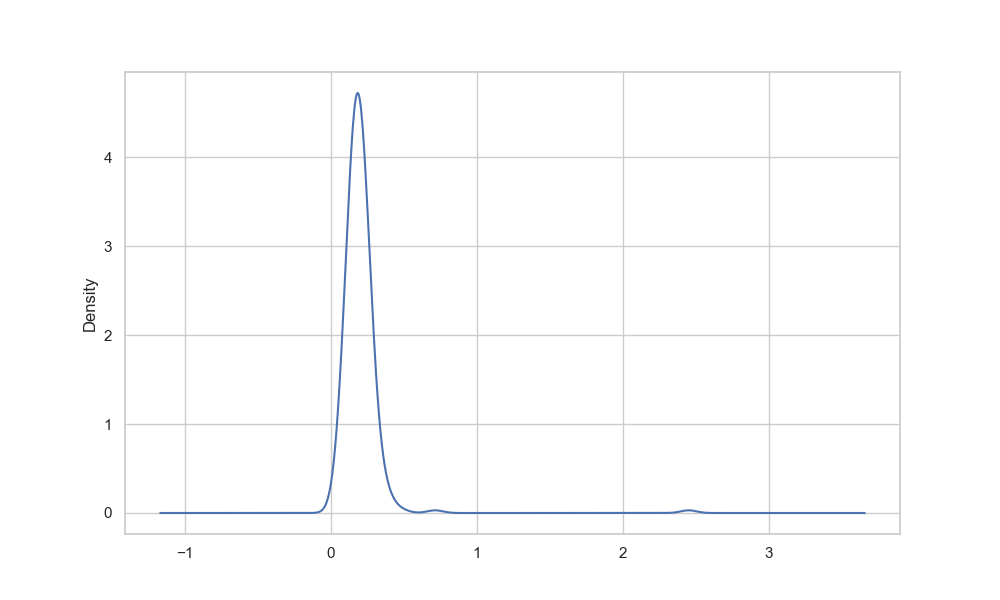

In [40]:
plt.figure()

tips['tip_pct'].plot.density()

<IPython.core.display.Javascript object>


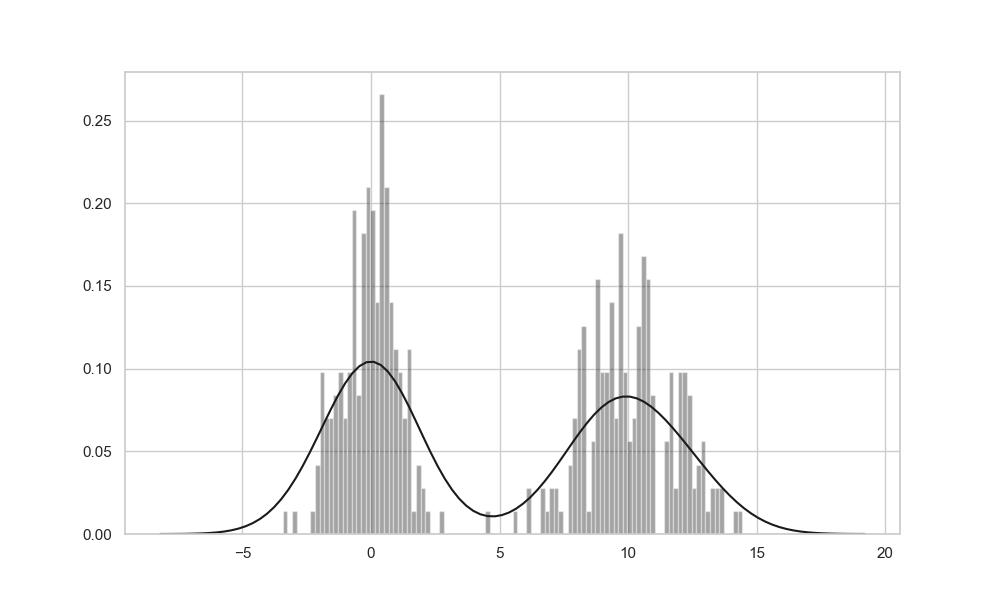

In [49]:
# 正态混合的标准化直方图与密度估计
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

plt.figure()
sns.distplot(values, bins=100, color='k')

### 散点图或点图

In [43]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<IPython.core.display.Javascript object>


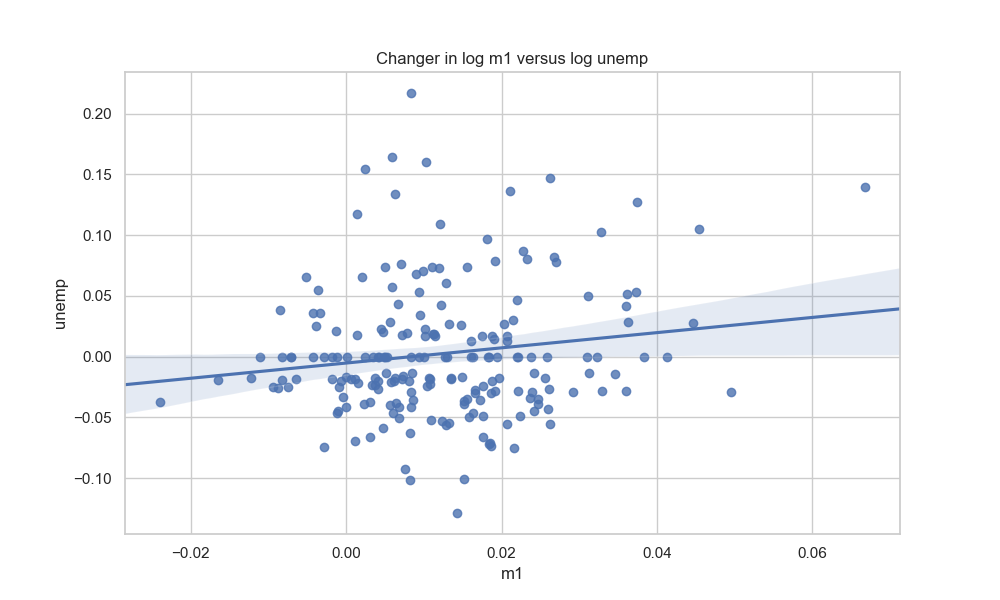

In [46]:
plt.figure()
sns.regplot('m1', 'unemp', data=trans_data)

In [47]:
plt.title('Changer in log %s versus log %s' % ('m1', 'unemp'))

Text(0.5, 1.0, 'Changer in log m1 versus log unemp')

<IPython.core.display.Javascript object>


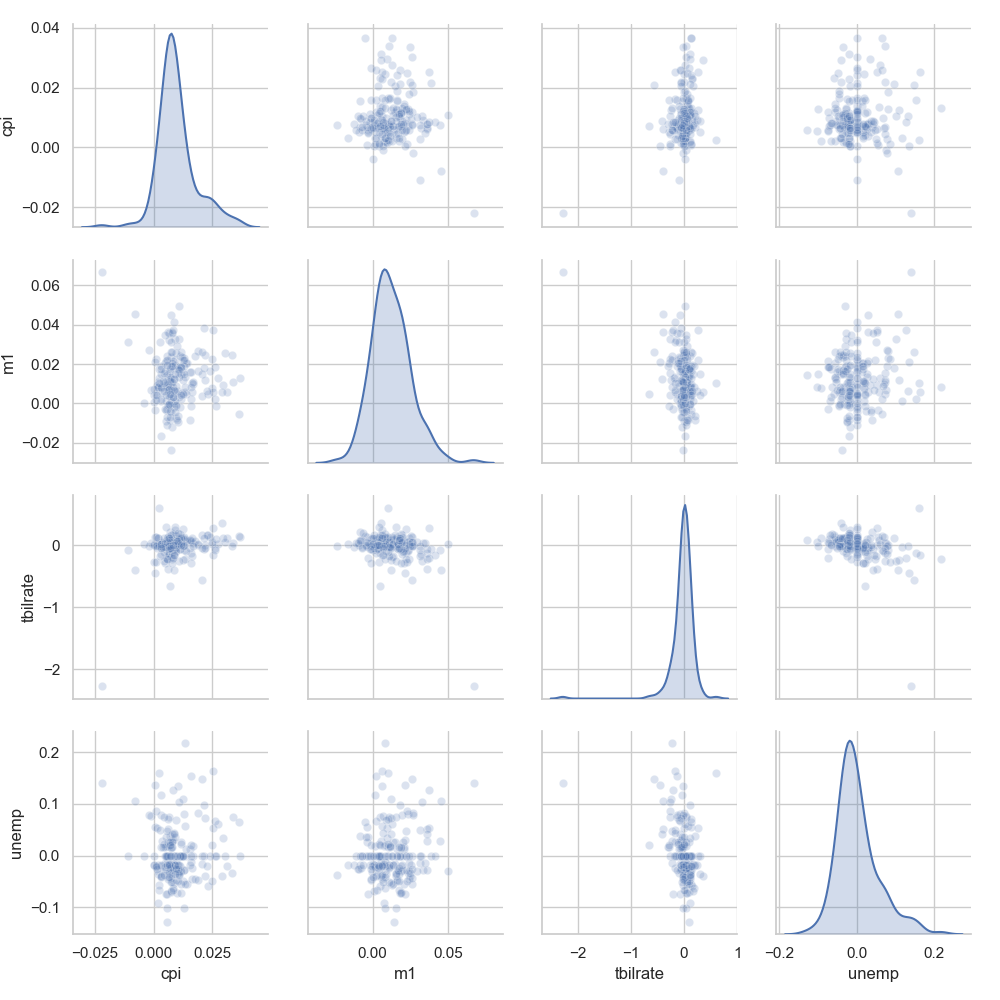

In [51]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2})  # 成对图矩阵

### 分面网格和分类数据

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


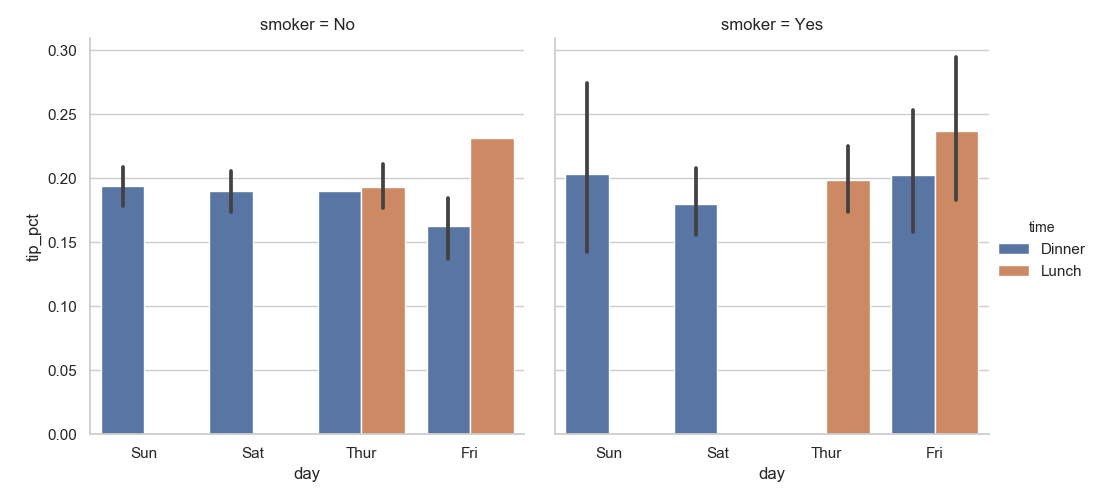

In [52]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


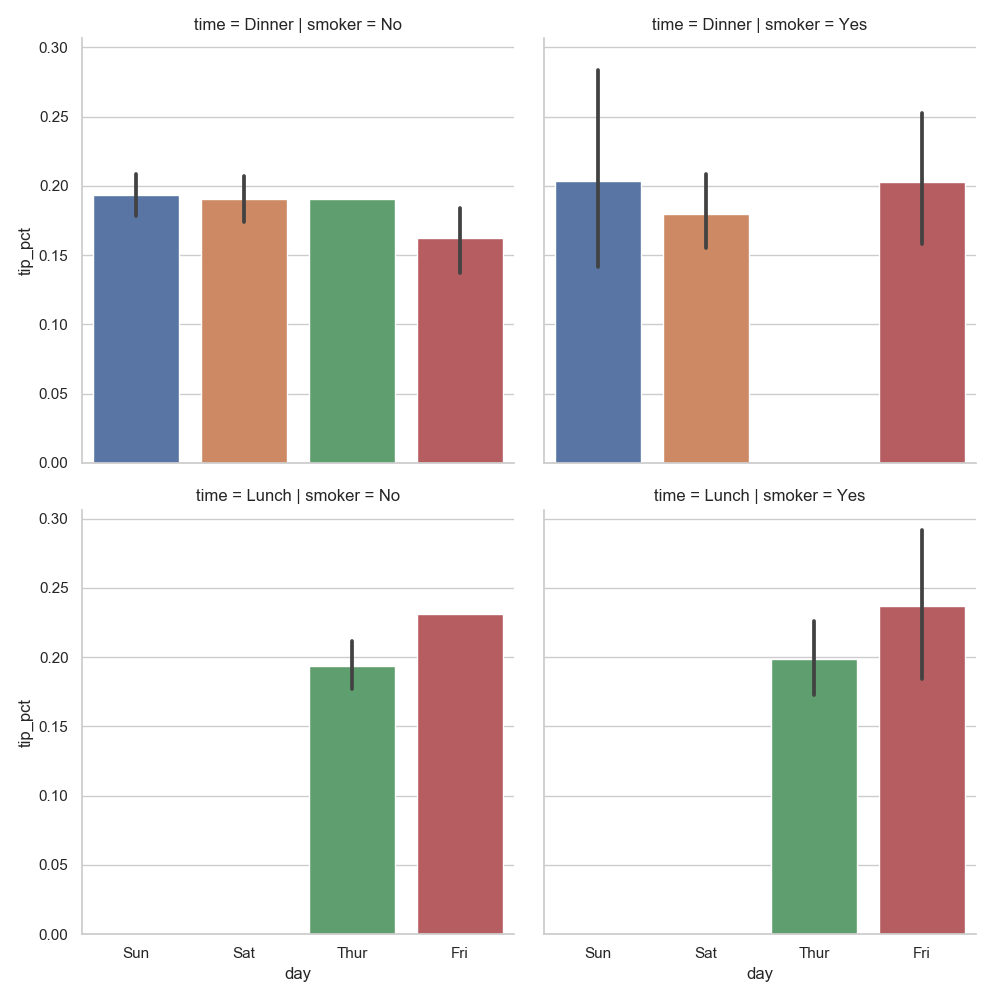

In [53]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


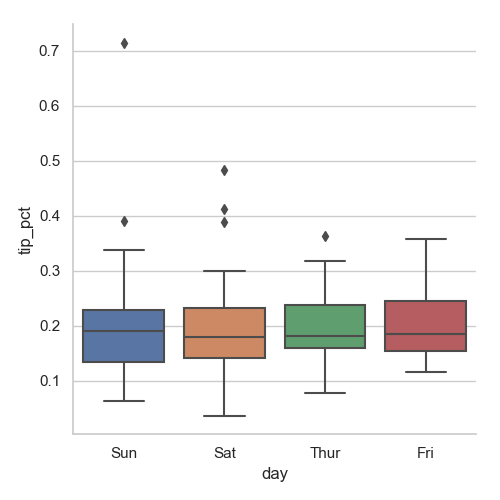

In [54]:
sns.factorplot(x='day', y='tip_pct', kind='box', data=tips[tips.tip_pct < 1])

## 其他 Python 可视化工具

浏览器直接创建交互式图像：Bokeh && Plotly

其他第三方工具：Tableau && DataV